# **Weed Detection**

In [13]:
import zipfile

# Specify the path to the zip file and extraction path
zip_path = r'C:\Users\ysais\Desktop\PJT1\open-sprayer-images.zip'  # replace with your zip file path
extract_folder = 'open_sprayer_images'    # replace with your desired output folder name

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted to", extract_folder)


Dataset extracted to open_sprayer_images


In [14]:
# Deleting unwanted data
!rm -rf "C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\Docknet"
!rm -rf r'C:\Users\ysais\Desktop\PJT1\open-sprayer-images.zip'

#### Exploring Dataset

In [15]:
import os
print("Folders in dataset :",os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet"))

Folders in dataset : ['train', 'valid']


In [16]:
print("Folders in training set :",os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train"))
print("Folders in validation set :",os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\valid"))

Folders in training set : ['docks', 'notdocks']
Folders in validation set : ['docks', 'notdocks']


In [17]:
print("Total images in 'train/docks' folder :",len(os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks")))
print("Total images in 'train/notdocks' folder :",len(os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\notdocks")))
print("Total images in 'valid/docks' folder :",len(os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\valid\docks")))
print("Total images in 'valid/notdocks' folder :",len(os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\valid\notdocks")))

Total images in 'train/docks' folder : 1176
Total images in 'train/notdocks' folder : 4851
Total images in 'valid/docks' folder : 130
Total images in 'valid/notdocks' folder : 540


## 1 . Pre - Processing

In [20]:
# Required libraries

# For image processing
import cv2

# For operating dataset
import os

# For visualizing graphs and images
import matplotlib.pyplot as plt

# For visualizing for loops
from tqdm import tqdm

# For finding files in directories
import glob

# For working with CNNs
import keras

# Normalization function for pre-trained models
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Alternative to cv_imshow for displaying images in Jupyter or local environments
def show_image(image):
    # Convert BGR (OpenCV format) to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()


In [21]:
# defining image size
img_size = 250
# pre-processing function
def preprocess(filename):
  ## reading images
  img = cv2.imread(filename)
  ## converting bgr to rgb color space
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  ## center crop
  cropped_img = img[int((img.shape[0] - min(img.shape[0], img.shape[1]))/2): int((img.shape[0] + min(img.shape[0], img.shape[1]))/2), int((img.shape[1] - min(img.shape[0], img.shape[1]))/2): int((img.shape[1] + min(img.shape[0], img.shape[1]))/2), :]
  ## image resizing
  img_ = cv2.resize(cropped_img, (img_size,img_size))
  ## converting pixel values to floats
  img_normal = img_.astype("float32")
  ## applying normalization method
  img_final = preprocess_input(img_normal)
  ## returning image
  return img_final

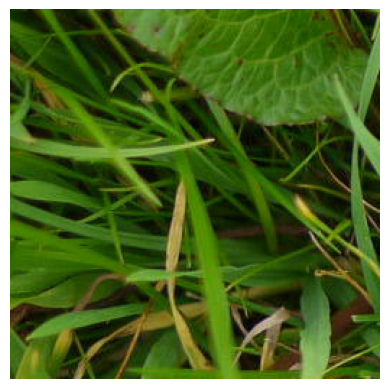

In [22]:
# Load an example image
image_path = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\3147_18464_8519.jpg"  # Replace with the correct image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Display the image using the custom function
    show_image(image)
else:
    print(f"Error: Unable to load image at {image_path}. Please check the path.")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Preprocessed image shape: (250, 250, 3)


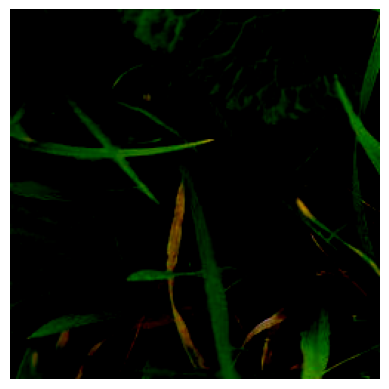

In [23]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import preprocess_input

def preprocess(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Resize to a specific dimension, e.g., (250, 250)
    image = cv2.resize(image, (250, 250))
    
    # Convert the color from BGR (OpenCV default) to RGB for correct display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Normalize the image
    image_rgb = preprocess_input(image_rgb)
    
    return image_rgb

# Apply preprocessing to the uploaded image
preprocessed_image = preprocess(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\3147_18464_8519.jpg")

# Display the preprocessed image
print("Preprocessed image shape:", preprocessed_image.shape)
plt.imshow(preprocessed_image)
plt.axis('off')  # Hide axis
plt.show()


In [24]:
#train dataset path
train_path = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks"
#getting all images paths
files = [f for f in os.listdir(train_path) if os.path.isfile(os.path.join(train_path, f))]
#array to store all images after pre-processing
images = []
#array to store all labels
labels = []
#iterating to all files and storing into arrays
for f in tqdm(files):
  img = preprocess(os.path.join(train_path,f))
  images.append(img)
  labels.append(0)

100%|██████████| 1176/1176 [00:02<00:00, 531.47it/s]


In [25]:
print("Total images in train set :",len(images))
print("Total labels in train set :",len(labels))

Total images in train set : 1176
Total labels in train set : 1176


In [26]:
#folder for saving the augmented images
os.mkdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\aug_images")

In [27]:
#data-augmentation
import numpy as np

datagen = ImageDataGenerator(
    ## rescaling pixel values between [0,1]
    rescale = 1./255,
    ## moving image
    shear_range = 0.2,
    ## zooming into image
    zoom_range = 0.2,
    ## fliping image
    horizontal_flip=True)
i = 0
## saving augmented images to aug_images folder
for i in tqdm(range(5000)):
  id_ = np.random.randint(len(images))
  for batch in datagen.flow(np.expand_dims(images[id_], axis = 0), save_to_dir = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\aug_images", save_prefix = 'aug', save_format = 'jpeg'):
    break

100%|██████████| 5000/5000 [01:17<00:00, 64.82it/s]


In [28]:
#checking total images in augmented folder
len(os.listdir(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\aug_images"))

3938

In [ ]:
#prepare dataset for training

# part 1 : Loading all images in augmented folder
path = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\aug_images"    #path for folder
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]     #getting all filenames in folder
for f in files:
  image = preprocess(os.path.join(path,f))    #applying preprocessing function
  images.append(image)    #storing preprocessed image
  labels.append(0)        #storing corressponding label

# part 2 : Loading all images in notdocks folder
path = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\notdocks"
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
for f in files:
  image = preprocess(os.path.join(path,f))
  images.append(image)
  labels.append(1)

# testing data loading

test_images = []
test_labels = []

# part 1 : Loading all images in docks folder

path = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\valid\docks"
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
for f in files:
  image = preprocess(os.path.join(path,f))
  test_images.append(image)
  test_labels.append(0)
# part 1 : Loading all images in notdocks folder
path = r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\valid\notdocks"
files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
for f in files:
  image = preprocess(os.path.join(path,f))
  test_images.append(image)
  test_labels.append(1)

In [30]:
# Shuffling training data

from random import shuffle
#array to save shuffled images
train_images = []
#array to save shuffled labels
train_labels = []
index_shu = np.arange(len(images))
shuffle(index_shu)
for i in index_shu:
  train_images.append(images[i])
  train_labels.append(labels[i])
# printing all shapes to cross check
print(np.array(train_images).shape)
print(np.array(train_labels).shape)
print(np.array(test_images).shape)
print(np.array(test_labels).shape)

(9965, 250, 250, 3)
(9965,)
(670, 250, 250, 3)
(670,)


## 2 . Classification

In [31]:
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import InceptionV3

def model():
    # Downloading InceptionV3 model weights
    base_model = InceptionV3(include_top=False, input_shape=(250, 250, 3), weights='imagenet')
    
    # Adding global average pooling layer
    avg_layer = GlobalAveragePooling2D()(base_model.output)
    
    # Adding dense layer for binary classification
    output_layer = Dense(2, activation='softmax')(avg_layer)
    
    # Combine layers into a final model
    final_model = Model(inputs=base_model.input, outputs=output_layer)
    
    return final_model


In [32]:
#Getting model
model = model()

In [33]:
#Summary of model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 250, 250,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 124, 124,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 124, 124,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 124, 124,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 122, 122,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 122, 122,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 122, 122,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 122, 122,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 122, 122,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 122, 122,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 60, 60,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 60, 60,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 60, 60,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 58, 58,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 58, 58,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 58, 58,    │          0 │ batch_normalizat

 Total params: 21,806,882 (83.19 MB)

 Trainable params: 21,772,450 (83.06 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [ ]:
#For fine tuning of model activating all layers except last 50 layers

for layer in model.layers:
  layer.trainable = True

for layer in model.layers[:-50]:
  layer.trainable = False

In [35]:
# Compiling model with binary crossentropy because of only two classes
model.compile(
    loss = 'binary_crossentropy',
    optimizer = keras.optimizers.Adamax(learning_rate=1e-2),
    metrics = ['accuracy']
)

In [36]:
#training data batch generator function

import keras
BS = 32  #defining batch size
def train_gen(images,labels):
  i=0
  while True:           #running infinite loop
    batch_imgs = np.array(images[i:i+BS])   #getting the batch size images from arrays
    if (batch_imgs.shape[0] == 0):
      break
    batch_targets = np.array(labels[i:i+BS])
    batch_labels = keras.utils.to_categorical(batch_targets, 2)  #converting labels to one-hot-encoding
    i+=BS
    yield batch_imgs, batch_labels

In [37]:
# training model
history = model.fit(
    train_gen(train_images, train_labels),
    steps_per_epoch=len(train_images) // BS // 8,
    epochs= 8
)

Epoch 1/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 962ms/step - accuracy: 0.8071 - loss: 0.4098
Epoch 2/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 945ms/step - accuracy: 0.9365 - loss: 0.1673
Epoch 3/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 960ms/step - accuracy: 0.9567 - loss: 0.1286
Epoch 4/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 949ms/step - accuracy: 0.9552 - loss: 0.1315
Epoch 5/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 36s 951ms/step - accuracy: 0.9582 - loss: 0.1343
Epoch 6/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9560 - loss: 0.1230
Epoch 7/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9576 - loss: 0.1271
Epoch 8/8
38/38 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9566 - loss: 0.1307


In [38]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


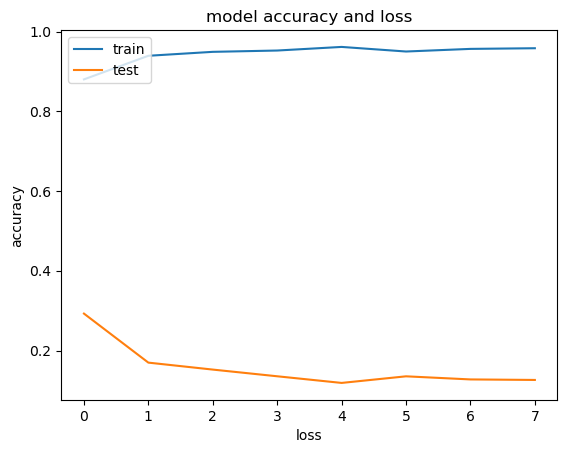

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Classification

#### CNN+Softmax

In [40]:
#Simple functions for displaying and showing predicted label

label = ['Docks','NotDocks']
def preprocess_out(filename):
  img = cv2.cvtColor(filename, cv2.COLOR_BGR2RGB)
  cropped_img = img[int((img.shape[0] - min(img.shape[0], img.shape[1]))/2): int((img.shape[0] + min(img.shape[0], img.shape[1]))/2), int((img.shape[1] - min(img.shape[0], img.shape[1]))/2): int((img.shape[1] + min(img.shape[0], img.shape[1]))/2), :]
  img_ = cv2.resize(cropped_img, (img_size,img_size))
  img_normal = img_.astype("float32")
  img_final = preprocess_input(img_normal)
  return img_final
def predict(img_path):
  img = cv2.imread(img_path)
  cv_imshow(img)
  imgTest = preprocess_out(img)
  imgtest = np.array(imgTest)
  imgtest = np.expand_dims(imgtest,axis=0)
  pred = model.predict(imgtest)
  val = np.argmax(pred)
  print(val)
  print('Predicted Label :', label[val])

In [41]:
import matplotlib.pyplot as plt

def predict(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    imgTest = preprocess_out(img)
    imgtest = np.array(imgTest)
    imgtest = np.expand_dims(imgtest, axis=0)
    pred = model.predict(imgtest)
    val = np.argmax(pred)
    print(val)
    print('Predicted Label :', label[val])


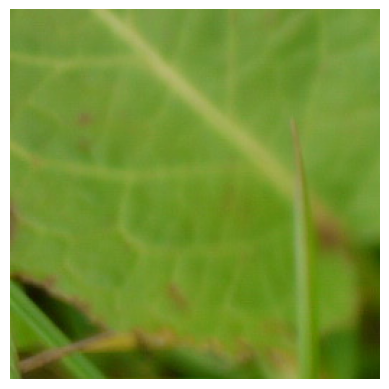

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
0
Predicted Label : Docks


In [42]:
predict(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\4935_22202_21131.jpg")

In [43]:
# CNN
train_predictions = []
print("loading training images !!!")
for i,file in enumerate(train_images):
    file = np.reshape(file, [1, file.shape[0], file.shape[1], file.shape[2]])
    prediction = model.predict(file)
    prediction = np.argmax(prediction)
    train_predictions.append(prediction)

test_predictions = []
print("loading testing images !!!")
for i,file in enumerate(test_images):
    file = np.reshape(file, [1, file.shape[0], file.shape[1], file.shape[2]])
    prediction = model.predict(file)
    prediction = np.argmax(prediction)
    test_predictions.append(prediction)


loading traning images !!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━

In [44]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(np.array(train_predictions),
                                     np.array(train_labels))
test_acc = accuracy_score(np.array(test_predictions),
                                     np.array(test_labels))

print('Train Accuray:' + str(train_acc))
print('Validation Accuray:' + str(test_acc))

Train Accuray:0.9289513296537882
Validation Accuray:0.8701492537313433


#### CNN+SVM


In [47]:
from sklearn.svm import SVC
from keras.models import Model
svm = SVC(kernel='rbf', probability=True)
model_feat = Model(inputs=model.input,outputs=model.get_layer('global_average_pooling2d').output)

In [48]:
import pandas as pd
import numpy as np
from tqdm import tqdm

batch_size = 64  # Choose a batch size that fits within your memory
feature_matrix = []

for i in tqdm(range(0, len(train_images), batch_size)):
    batch = train_images[i:i+batch_size]
    batch = np.array(batch)  # Ensure it's a numpy array for the batch
    feat_batch = model_feat.predict(batch)
    feature_matrix.extend(feat_batch)  # Append batch features directly

feature_matrix = np.array(feature_matrix)
pd.DataFrame(feature_matrix).to_csv("features.csv")


  0%|          | 0/156 [00:00<?, ?it/s]

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 678ms/step


  1%|          | 1/156 [00:04<12:34,  4.87s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


  1%|▏         | 2/156 [00:06<07:33,  2.94s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step


  2%|▏         | 3/156 [00:08<05:59,  2.35s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


  3%|▎         | 4/156 [00:09<05:10,  2.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


  3%|▎         | 5/156 [00:11<04:45,  1.89s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step


  4%|▍         | 6/156 [00:12<04:28,  1.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


  4%|▍         | 7/156 [00:14<04:19,  1.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  5%|▌         | 8/156 [00:16<04:10,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step


  6%|▌         | 9/156 [00:17<04:04,  1.66s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step


  6%|▋         | 10/156 [00:19<04:00,  1.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step


  7%|▋         | 11/156 [00:20<03:56,  1.63s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


  8%|▊         | 12/156 [00:22<03:52,  1.62s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


  8%|▊         | 13/156 [00:24<03:50,  1.61s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step


  9%|▉         | 14/156 [00:25<03:47,  1.60s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


 10%|▉         | 15/156 [00:27<03:45,  1.60s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


 10%|█         | 16/156 [00:28<03:44,  1.61s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


 11%|█         | 17/156 [00:30<03:44,  1.61s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


 12%|█▏        | 18/156 [00:32<03:42,  1.61s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 12%|█▏        | 19/156 [00:33<03:41,  1.62s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step


 13%|█▎        | 20/156 [00:35<03:43,  1.64s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step


 13%|█▎        | 21/156 [00:37<03:44,  1.66s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 798ms/step


 14%|█▍        | 22/156 [00:39<03:49,  1.71s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


 15%|█▍        | 23/156 [00:40<03:45,  1.70s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step


 15%|█▌        | 24/156 [00:42<03:47,  1.73s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step


 16%|█▌        | 25/156 [00:44<03:41,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


 17%|█▋        | 26/156 [00:45<03:38,  1.68s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 17%|█▋        | 27/156 [00:47<03:35,  1.67s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step


 18%|█▊        | 28/156 [00:48<03:31,  1.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


 19%|█▊        | 29/156 [00:50<03:28,  1.64s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step


 19%|█▉        | 30/156 [00:52<03:30,  1.67s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 771ms/step


 20%|█▉        | 31/156 [00:54<03:32,  1.70s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


 21%|██        | 32/156 [00:55<03:29,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 818ms/step


 21%|██        | 33/156 [00:57<03:32,  1.73s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 845ms/step


 22%|██▏       | 34/156 [00:59<03:32,  1.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step


 22%|██▏       | 35/156 [01:01<03:35,  1.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 811ms/step


 23%|██▎       | 36/156 [01:03<03:36,  1.80s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


 24%|██▎       | 37/156 [01:04<03:28,  1.75s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


 24%|██▍       | 38/156 [01:06<03:22,  1.72s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step


 25%|██▌       | 39/156 [01:08<03:18,  1.70s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 892ms/step


 26%|██▌       | 40/156 [01:09<03:22,  1.75s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 898ms/step


 26%|██▋       | 41/156 [01:11<03:30,  1.83s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 746ms/step


 27%|██▋       | 42/156 [01:13<03:21,  1.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 818ms/step


 28%|██▊       | 43/156 [01:15<03:22,  1.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


 28%|██▊       | 44/156 [01:16<03:13,  1.72s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


 29%|██▉       | 45/156 [01:18<03:05,  1.68s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


 29%|██▉       | 46/156 [01:20<03:01,  1.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 722ms/step


 30%|███       | 47/156 [01:21<02:59,  1.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


 31%|███       | 48/156 [01:23<02:55,  1.63s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step


 31%|███▏      | 49/156 [01:24<02:50,  1.59s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step


 32%|███▏      | 50/156 [01:26<02:52,  1.62s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 769ms/step


 33%|███▎      | 51/156 [01:28<02:50,  1.63s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 863ms/step


 33%|███▎      | 52/156 [01:29<02:53,  1.67s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step


 34%|███▍      | 53/156 [01:31<02:50,  1.66s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 904ms/step


 35%|███▍      | 54/156 [01:33<02:57,  1.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 821ms/step


 35%|███▌      | 55/156 [01:35<02:56,  1.75s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 855ms/step


 36%|███▌      | 56/156 [01:37<02:56,  1.76s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step


 37%|███▋      | 57/156 [01:38<02:54,  1.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 867ms/step


 37%|███▋      | 58/156 [01:40<02:56,  1.80s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 817ms/step


 38%|███▊      | 59/156 [01:42<02:53,  1.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 820ms/step


 38%|███▊      | 60/156 [01:44<02:50,  1.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


 39%|███▉      | 61/156 [01:46<02:59,  1.88s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


 40%|███▉      | 62/156 [01:48<03:03,  1.95s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 918ms/step


 40%|████      | 63/156 [01:50<03:05,  1.99s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 907ms/step


 41%|████      | 64/156 [01:52<03:02,  1.98s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 855ms/step


 42%|████▏     | 65/156 [01:54<02:56,  1.94s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step


 42%|████▏     | 66/156 [01:56<02:47,  1.86s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 799ms/step


 43%|████▎     | 67/156 [01:57<02:42,  1.82s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 804ms/step


 44%|████▎     | 68/156 [01:59<02:40,  1.83s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 752ms/step


 44%|████▍     | 69/156 [02:01<02:34,  1.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 741ms/step


 45%|████▍     | 70/156 [02:02<02:29,  1.74s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 762ms/step


 46%|████▌     | 71/156 [02:04<02:25,  1.71s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 772ms/step


 46%|████▌     | 72/156 [02:06<02:22,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step


 47%|████▋     | 73/156 [02:07<02:19,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 758ms/step


 47%|████▋     | 74/156 [02:09<02:19,  1.70s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 763ms/step


 48%|████▊     | 75/156 [02:11<02:16,  1.68s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step


 49%|████▊     | 76/156 [02:12<02:12,  1.66s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


 49%|████▉     | 77/156 [02:14<02:09,  1.64s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 776ms/step


 50%|█████     | 78/156 [02:16<02:07,  1.64s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 753ms/step


 51%|█████     | 79/156 [02:17<02:05,  1.63s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 757ms/step


 51%|█████▏    | 80/156 [02:19<02:05,  1.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 803ms/step


 52%|█████▏    | 81/156 [02:21<02:03,  1.65s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 785ms/step


 53%|█████▎    | 82/156 [02:22<02:03,  1.67s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 875ms/step


 53%|█████▎    | 83/156 [02:24<02:08,  1.76s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 862ms/step


 54%|█████▍    | 84/156 [02:26<02:08,  1.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 838ms/step


 54%|█████▍    | 85/156 [02:28<02:06,  1.78s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


 55%|█████▌    | 86/156 [02:30<02:10,  1.86s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 875ms/step


 56%|█████▌    | 87/156 [02:32<02:10,  1.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 883ms/step


 56%|█████▋    | 88/156 [02:34<02:07,  1.87s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 892ms/step


 57%|█████▋    | 89/156 [02:35<02:04,  1.85s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 883ms/step


 58%|█████▊    | 90/156 [02:37<02:01,  1.84s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 919ms/step


 58%|█████▊    | 91/156 [02:39<02:01,  1.88s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 758ms/step


 59%|█████▉    | 92/156 [02:41<01:55,  1.81s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step


 60%|█████▉    | 93/156 [02:43<01:52,  1.79s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 754ms/step


 60%|██████    | 94/156 [02:44<01:48,  1.76s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 854ms/step


 61%|██████    | 95/156 [02:46<01:47,  1.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 801ms/step


 62%|██████▏   | 96/156 [02:48<01:46,  1.77s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 753ms/step


 62%|██████▏   | 97/156 [02:50<01:43,  1.76s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 738ms/step


 63%|██████▎   | 98/156 [02:51<01:39,  1.72s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 743ms/step


 63%|██████▎   | 99/156 [02:53<01:36,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 753ms/step


 64%|██████▍   | 100/156 [02:55<01:34,  1.68s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 809ms/step


 65%|██████▍   | 101/156 [02:56<01:33,  1.69s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 940ms/step


 65%|██████▌   | 102/156 [02:58<01:34,  1.75s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 933ms/step


 66%|██████▌   | 103/156 [03:00<01:39,  1.87s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 909ms/step


 67%|██████▋   | 104/156 [03:02<01:39,  1.91s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 836ms/step


 67%|██████▋   | 105/156 [03:04<01:37,  1.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 888ms/step


 68%|██████▊   | 106/156 [03:06<01:36,  1.93s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 946ms/step


 69%|██████▊   | 107/156 [03:08<01:39,  2.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 969ms/step


 69%|██████▉   | 108/156 [03:11<01:38,  2.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


 70%|██████▉   | 109/156 [03:14<01:57,  2.51s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


 71%|███████   | 110/156 [03:17<02:00,  2.61s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 871ms/step


 71%|███████   | 111/156 [03:19<01:50,  2.45s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 777ms/step


 72%|███████▏  | 112/156 [03:21<01:40,  2.28s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 854ms/step


 72%|███████▏  | 113/156 [03:23<01:35,  2.22s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 805ms/step


 73%|███████▎  | 114/156 [03:25<01:29,  2.14s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step


 74%|███████▎  | 115/156 [03:27<01:21,  2.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step


 74%|███████▍  | 116/156 [03:28<01:17,  1.94s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 920ms/step


 75%|███████▌  | 117/156 [03:31<01:17,  1.98s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 902ms/step


 76%|███████▌  | 118/156 [03:33<01:17,  2.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step


 76%|███████▋  | 119/156 [03:35<01:15,  2.03s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 925ms/step


 77%|███████▋  | 120/156 [03:37<01:13,  2.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


 78%|███████▊  | 121/156 [03:39<01:15,  2.17s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


 78%|███████▊  | 122/156 [03:42<01:19,  2.32s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 963ms/step


 79%|███████▉  | 123/156 [03:44<01:16,  2.31s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 888ms/step


 79%|███████▉  | 124/156 [03:46<01:11,  2.22s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 755ms/step


 80%|████████  | 125/156 [03:48<01:05,  2.12s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step


 81%|████████  | 126/156 [03:50<00:59,  2.00s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step


 81%|████████▏ | 127/156 [03:52<00:55,  1.93s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


 82%|████████▏ | 128/156 [03:54<00:55,  1.98s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 923ms/step


 83%|████████▎ | 129/156 [03:56<00:54,  2.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 812ms/step


 83%|████████▎ | 130/156 [03:58<00:51,  1.97s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 982ms/step


 84%|████████▍ | 131/156 [04:00<00:52,  2.09s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 893ms/step


 85%|████████▍ | 132/156 [04:02<00:49,  2.06s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 753ms/step


 85%|████████▌ | 133/156 [04:04<00:45,  1.97s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 954ms/step


 86%|████████▌ | 134/156 [04:06<00:43,  1.99s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 972ms/step


 87%|████████▋ | 135/156 [04:08<00:42,  2.01s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


 87%|████████▋ | 136/156 [04:10<00:41,  2.10s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 991ms/step


 88%|████████▊ | 137/156 [04:12<00:39,  2.10s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


 88%|████████▊ | 138/156 [04:14<00:37,  2.10s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 943ms/step


 89%|████████▉ | 139/156 [04:17<00:37,  2.18s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 891ms/step


 90%|████████▉ | 140/156 [04:19<00:33,  2.11s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 867ms/step


 90%|█████████ | 141/156 [04:21<00:30,  2.04s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 811ms/step


 91%|█████████ | 142/156 [04:22<00:27,  1.97s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 787ms/step


 92%|█████████▏| 143/156 [04:24<00:24,  1.91s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step


 92%|█████████▏| 144/156 [04:26<00:22,  1.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 893ms/step


 93%|█████████▎| 145/156 [04:28<00:21,  1.92s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 865ms/step


 94%|█████████▎| 146/156 [04:30<00:19,  1.94s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 754ms/step


 94%|█████████▍| 147/156 [04:32<00:16,  1.88s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step


 95%|█████████▍| 148/156 [04:33<00:14,  1.86s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step


 96%|█████████▌| 149/156 [04:35<00:12,  1.83s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 954ms/step


 96%|█████████▌| 150/156 [04:37<00:11,  1.89s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 852ms/step


 97%|█████████▋| 151/156 [04:39<00:09,  1.90s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 923ms/step


 97%|█████████▋| 152/156 [04:41<00:07,  1.97s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step


 98%|█████████▊| 153/156 [04:43<00:05,  1.95s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 831ms/step


 99%|█████████▊| 154/156 [04:45<00:03,  1.91s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 937ms/step


 99%|█████████▉| 155/156 [04:47<00:01,  1.94s/it]

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 5s/step  


100%|██████████| 156/156 [04:53<00:00,  1.88s/it]


In [49]:
# Load generated feature matrix
import pandas as pd
test_fm = pd.read_csv('features.csv', index_col = 0).values

In [50]:
# Train and Save SVM Model
import pickle
from sklearn import model_selection
svm.fit(test_fm,np.array(train_labels))
print('fitting done !!!')
filename = 'finalized_svm_model.sav'
pickle.dump(svm, open(filename, 'wb'))

fitting done !!!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


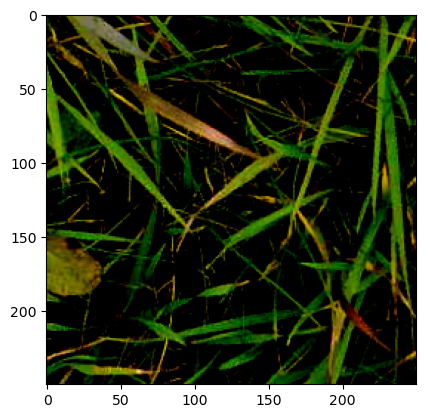

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
0


In [51]:
# Prediction with CNN + Softmax
img = preprocess(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\3951_19544_32363.jpg")
plt.imshow(img)
plt.show()
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
prediction = model.predict(img)
print(np.argmax(prediction))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


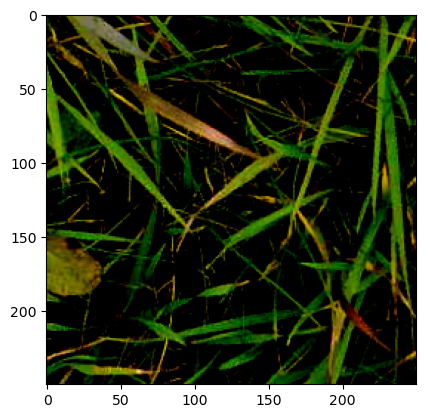

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([0])

In [52]:
# Prediction with CNN + SVM
img = preprocess(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\3951_19544_32363.jpg")
plt.imshow(img)
plt.show()
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
prediction = model_feat.predict(img)
prediction = svm.predict(prediction)
prediction

In [53]:
# CNN + SVM
import sklearn

val_feature_matrix = []
for item in test_images:
    item = np.reshape(item, [1, item.shape[0], item.shape[1], item.shape[2]])
    feat_train = model_feat.predict(item)
    val_feature_matrix.append(feat_train)
val_feature_matrix = np.array(val_feature_matrix)[:,0,:]

print('Train Accuracy: ' + str(svm.score(test_fm,train_labels)))
print('Validation Accuracy: ' + str(svm.score(val_feature_matrix,test_labels)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

#### CNN+Random forest

In [54]:
#CNN + Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model
import pandas as pd

rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

rf.fit(test_fm,np.array(train_labels))
print('fitting done !!!')

# Save RF Model
import pickle
from sklearn import model_selection
filename = 'finalized_rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

fitting done !!!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


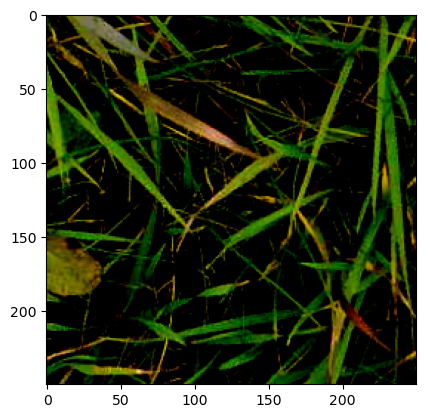

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([0])

In [55]:
# Prediction with CNN + Random Forests Classifier
img = preprocess(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\3951_19544_32363.jpg")
plt.imshow(img)
plt.show()
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
prediction = model_feat.predict(img)
prediction = rf.predict(prediction)
prediction

In [56]:
import sklearn

val_feature_matrix = []
for item in tqdm(test_images):
    item = np.reshape(item, [1, item.shape[0], item.shape[1], item.shape[2]])
    feat_train = model_feat.predict(item)
    val_feature_matrix.append(feat_train)
val_feature_matrix = np.array(val_feature_matrix)[:,0,:]

print('Train Accuracy: ' + str(rf.score(test_fm,np.array(train_labels))))
print('Validation Accuracy: ' + str(rf.score(val_feature_matrix,np.array(test_labels))))

  0%|          | 0/670 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  0%|          | 1/670 [00:00<01:15,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  0%|          | 2/670 [00:00<01:10,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  0%|          | 3/670 [00:00<01:09,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  1%|          | 4/670 [00:00<01:08,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  1%|          | 5/670 [00:00<01:09,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  1%|          | 7/670 [00:00<01:06,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  1%|          | 8/670 [00:00<01:07,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  1%|▏         | 9/670 [00:00<01:07,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  1%|▏         | 10/670 [00:01<01:10,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  2%|▏         | 11/670 [00:01<01:09,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  2%|▏         | 12/670 [00:01<01:09,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  2%|▏         | 13/670 [00:01<01:09,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 14/670 [00:01<01:10,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  2%|▏         | 15/670 [00:01<01:12,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  2%|▏         | 16/670 [00:01<01:12,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


  3%|▎         | 17/670 [00:01<01:12,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  3%|▎         | 18/670 [00:01<01:18,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  3%|▎         | 19/670 [00:02<01:16,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  3%|▎         | 20/670 [00:02<01:14,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  3%|▎         | 21/670 [00:02<01:14,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  3%|▎         | 22/670 [00:02<01:12,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  3%|▎         | 23/670 [00:02<01:14,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  4%|▎         | 24/670 [00:02<01:13,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▎         | 25/670 [00:02<01:15,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  4%|▍         | 26/670 [00:02<01:16,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  4%|▍         | 27/670 [00:02<01:15,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  4%|▍         | 28/670 [00:03<01:13,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  4%|▍         | 29/670 [00:03<01:11,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  4%|▍         | 30/670 [00:03<01:11,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  5%|▍         | 31/670 [00:03<01:14,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  5%|▍         | 32/670 [00:03<01:19,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


  5%|▍         | 33/670 [00:03<01:15,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  5%|▌         | 34/670 [00:03<01:13,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  5%|▌         | 35/670 [00:03<01:11,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  5%|▌         | 36/670 [00:04<01:10,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


  6%|▌         | 37/670 [00:04<01:10,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  6%|▌         | 38/670 [00:04<01:10,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  6%|▌         | 39/670 [00:04<01:15,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  6%|▌         | 40/670 [00:04<01:13,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


  6%|▌         | 41/670 [00:04<01:11,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  6%|▋         | 42/670 [00:04<01:11,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  6%|▋         | 43/670 [00:04<01:11,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  7%|▋         | 44/670 [00:04<01:10,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  7%|▋         | 45/670 [00:05<01:10,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  7%|▋         | 46/670 [00:05<01:14,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  7%|▋         | 47/670 [00:05<01:12,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  7%|▋         | 48/670 [00:05<01:10,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  7%|▋         | 49/670 [00:05<01:11,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  8%|▊         | 51/670 [00:05<01:08,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


  8%|▊         | 52/670 [00:05<01:07,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  8%|▊         | 53/670 [00:05<01:12,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  8%|▊         | 54/670 [00:06<01:13,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


  8%|▊         | 55/670 [00:06<01:11,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  8%|▊         | 56/670 [00:06<01:10,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  9%|▊         | 57/670 [00:06<01:09,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


  9%|▊         | 58/670 [00:06<01:08,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  9%|▉         | 59/670 [00:06<01:09,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


  9%|▉         | 60/670 [00:06<01:15,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


  9%|▉         | 61/670 [00:06<01:13,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  9%|▉         | 62/670 [00:07<01:11,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  9%|▉         | 63/670 [00:07<01:10,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 10%|▉         | 64/670 [00:07<01:09,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 10%|▉         | 65/670 [00:07<01:06,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 10%|▉         | 66/670 [00:07<01:10,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 67/670 [00:07<01:22,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 10%|█         | 68/670 [00:07<01:19,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 10%|█         | 69/670 [00:07<01:15,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 70/670 [00:08<01:19,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█         | 71/670 [00:08<01:25,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 11%|█         | 72/670 [00:08<01:21,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 73/670 [00:08<01:22,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 11%|█         | 74/670 [00:08<01:17,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 11%|█         | 75/670 [00:08<01:13,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 11%|█▏        | 76/670 [00:08<01:10,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 11%|█▏        | 77/670 [00:08<01:09,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 12%|█▏        | 78/670 [00:09<01:08,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 79/670 [00:09<01:13,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 12%|█▏        | 80/670 [00:09<01:09,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 12%|█▏        | 81/670 [00:09<01:08,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 12%|█▏        | 82/670 [00:09<01:10,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 12%|█▏        | 83/670 [00:09<01:11,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 13%|█▎        | 84/670 [00:09<01:08,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 85/670 [00:09<01:08,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 13%|█▎        | 86/670 [00:09<01:12,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 13%|█▎        | 87/670 [00:10<01:09,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 13%|█▎        | 88/670 [00:10<01:08,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 13%|█▎        | 89/670 [00:10<01:06,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 13%|█▎        | 90/670 [00:10<01:06,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 14%|█▎        | 91/670 [00:10<01:05,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 14%|█▎        | 92/670 [00:10<01:04,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 14%|█▍        | 93/670 [00:10<01:09,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 14%|█▍        | 94/670 [00:10<01:07,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▍        | 95/670 [00:11<01:07,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 14%|█▍        | 96/670 [00:11<01:05,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 14%|█▍        | 97/670 [00:11<01:05,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 15%|█▍        | 98/670 [00:11<01:10,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 15%|█▍        | 99/670 [00:11<01:09,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 15%|█▍        | 100/670 [00:11<01:10,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 15%|█▌        | 101/670 [00:11<01:09,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 15%|█▌        | 102/670 [00:11<01:07,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 15%|█▌        | 103/670 [00:11<01:06,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 16%|█▌        | 104/670 [00:12<01:06,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 16%|█▌        | 105/670 [00:12<01:05,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 16%|█▌        | 106/670 [00:12<01:05,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▌        | 107/670 [00:12<01:11,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 16%|█▌        | 108/670 [00:12<01:10,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 16%|█▋        | 109/670 [00:12<01:08,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 16%|█▋        | 110/670 [00:12<01:05,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 17%|█▋        | 111/670 [00:12<01:06,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 17%|█▋        | 112/670 [00:13<01:05,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 113/670 [00:13<01:08,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 17%|█▋        | 114/670 [00:13<01:07,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 17%|█▋        | 115/670 [00:13<01:06,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 17%|█▋        | 116/670 [00:13<01:06,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 17%|█▋        | 117/670 [00:13<01:05,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 18%|█▊        | 118/670 [00:13<01:05,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 18%|█▊        | 119/670 [00:13<01:08,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 18%|█▊        | 120/670 [00:14<01:07,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 121/670 [00:14<01:09,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 122/670 [00:14<01:15,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 18%|█▊        | 123/670 [00:14<01:17,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 19%|█▊        | 124/670 [00:14<01:25,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▊        | 125/670 [00:14<01:32,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 126/670 [00:15<01:30,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 127/670 [00:15<01:28,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 19%|█▉        | 128/670 [00:15<01:29,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 19%|█▉        | 129/670 [00:15<01:23,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 19%|█▉        | 130/670 [00:15<01:18,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|█▉        | 131/670 [00:15<01:18,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 20%|█▉        | 132/670 [00:15<01:14,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 20%|█▉        | 133/670 [00:16<01:11,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 20%|██        | 134/670 [00:16<01:09,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 20%|██        | 135/670 [00:16<01:07,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 20%|██        | 136/670 [00:16<01:06,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|██        | 137/670 [00:16<01:13,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 138/670 [00:16<01:19,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 139/670 [00:16<01:20,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 21%|██        | 140/670 [00:17<01:20,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 141/670 [00:17<01:22,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 21%|██        | 142/670 [00:17<01:18,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 21%|██▏       | 143/670 [00:17<01:17,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 21%|██▏       | 144/670 [00:17<01:13,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 22%|██▏       | 145/670 [00:17<01:09,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 22%|██▏       | 146/670 [00:17<01:09,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 22%|██▏       | 147/670 [00:17<01:06,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 22%|██▏       | 148/670 [00:18<01:04,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 149/670 [00:18<01:08,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 22%|██▏       | 150/670 [00:18<01:07,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 23%|██▎       | 151/670 [00:18<01:05,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 23%|██▎       | 152/670 [00:18<01:05,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 23%|██▎       | 153/670 [00:18<01:08,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 23%|██▎       | 154/670 [00:18<01:05,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 23%|██▎       | 155/670 [00:18<01:07,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 23%|██▎       | 156/670 [00:19<01:06,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 23%|██▎       | 157/670 [00:19<01:06,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 24%|██▎       | 158/670 [00:19<01:03,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 24%|██▎       | 159/670 [00:19<01:01,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 160/670 [00:19<01:05,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 161/670 [00:19<01:08,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 24%|██▍       | 162/670 [00:19<01:06,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 24%|██▍       | 163/670 [00:19<01:03,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 24%|██▍       | 164/670 [00:20<01:02,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 25%|██▍       | 165/670 [00:20<01:01,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 25%|██▍       | 166/670 [00:20<01:00,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|██▍       | 167/670 [00:20<01:04,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 25%|██▌       | 168/670 [00:20<01:04,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 25%|██▌       | 169/670 [00:20<01:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 25%|██▌       | 170/670 [00:20<01:01,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 26%|██▌       | 171/670 [00:20<01:00,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 26%|██▌       | 172/670 [00:21<01:00,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 26%|██▌       | 173/670 [00:21<01:03,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 26%|██▌       | 174/670 [00:21<01:01,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 26%|██▌       | 175/670 [00:21<00:59,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 26%|██▋       | 176/670 [00:21<00:59,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 26%|██▋       | 177/670 [00:21<00:58,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 27%|██▋       | 178/670 [00:21<00:57,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 27%|██▋       | 179/670 [00:21<01:01,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 27%|██▋       | 180/670 [00:22<00:59,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 27%|██▋       | 181/670 [00:22<01:01,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 27%|██▋       | 182/670 [00:22<01:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 27%|██▋       | 183/670 [00:22<00:59,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 27%|██▋       | 184/670 [00:22<00:58,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██▊       | 185/670 [00:22<01:02,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 28%|██▊       | 186/670 [00:22<01:00,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 28%|██▊       | 187/670 [00:22<00:59,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 28%|██▊       | 188/670 [00:23<00:58,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 28%|██▊       | 189/670 [00:23<00:58,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 28%|██▊       | 190/670 [00:23<00:59,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▊       | 191/670 [00:23<01:02,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 29%|██▊       | 192/670 [00:23<01:00,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 29%|██▉       | 193/670 [00:23<00:59,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 29%|██▉       | 194/670 [00:23<00:59,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 29%|██▉       | 195/670 [00:23<00:58,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 29%|██▉       | 196/670 [00:24<00:58,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 29%|██▉       | 197/670 [00:24<01:00,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 30%|██▉       | 198/670 [00:24<00:59,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 30%|██▉       | 199/670 [00:24<00:59,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 30%|██▉       | 200/670 [00:24<00:57,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 30%|███       | 201/670 [00:24<00:56,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 30%|███       | 202/670 [00:24<00:57,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 30%|███       | 203/670 [00:24<01:00,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 30%|███       | 204/670 [00:25<00:59,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 31%|███       | 205/670 [00:25<00:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 31%|███       | 206/670 [00:25<00:58,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 31%|███       | 207/670 [00:25<00:57,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 31%|███       | 208/670 [00:25<00:58,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 31%|███       | 209/670 [00:25<00:59,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 31%|███▏      | 210/670 [00:25<00:59,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 31%|███▏      | 211/670 [00:25<00:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 32%|███▏      | 212/670 [00:26<00:58,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 32%|███▏      | 213/670 [00:26<00:56,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 32%|███▏      | 214/670 [00:26<00:56,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 32%|███▏      | 215/670 [00:26<00:59,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 216/670 [00:26<00:59,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 32%|███▏      | 217/670 [00:26<00:57,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 33%|███▎      | 218/670 [00:26<00:56,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 33%|███▎      | 219/670 [00:26<00:56,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 33%|███▎      | 220/670 [00:27<00:57,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 221/670 [00:27<01:00,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 33%|███▎      | 222/670 [00:27<00:59,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 33%|███▎      | 223/670 [00:27<00:58,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 33%|███▎      | 224/670 [00:27<00:57,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 34%|███▎      | 225/670 [00:27<00:59,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███▎      | 226/670 [00:27<01:00,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 34%|███▍      | 227/670 [00:28<01:02,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 34%|███▍      | 228/670 [00:28<00:59,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 34%|███▍      | 229/670 [00:28<00:57,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 34%|███▍      | 230/670 [00:28<00:55,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 34%|███▍      | 231/670 [00:28<00:55,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 35%|███▍      | 232/670 [00:28<00:56,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 233/670 [00:28<00:58,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 35%|███▍      | 234/670 [00:28<00:57,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 35%|███▌      | 235/670 [00:29<00:56,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 35%|███▌      | 236/670 [00:29<00:55,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 35%|███▌      | 237/670 [00:29<00:54,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 36%|███▌      | 238/670 [00:29<00:54,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 239/670 [00:29<00:57,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|███▌      | 240/670 [00:29<00:58,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 36%|███▌      | 241/670 [00:29<00:56,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 36%|███▌      | 242/670 [00:30<00:54,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 36%|███▋      | 243/670 [00:30<00:54,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▋      | 244/670 [00:30<00:57,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 37%|███▋      | 245/670 [00:30<00:55,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 37%|███▋      | 246/670 [00:30<00:55,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 247/670 [00:30<00:56,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 37%|███▋      | 248/670 [00:30<00:55,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 249/670 [00:30<00:58,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 37%|███▋      | 250/670 [00:31<00:56,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 37%|███▋      | 251/670 [00:31<00:54,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 38%|███▊      | 252/670 [00:31<00:55,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 38%|███▊      | 253/670 [00:31<00:53,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 38%|███▊      | 254/670 [00:31<00:51,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 38%|███▊      | 255/670 [00:31<00:52,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 38%|███▊      | 256/670 [00:31<00:51,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 38%|███▊      | 257/670 [00:31<00:51,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 39%|███▊      | 258/670 [00:32<00:50,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 39%|███▊      | 259/670 [00:32<00:49,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 39%|███▉      | 260/670 [00:32<00:49,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 39%|███▉      | 261/670 [00:32<00:48,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 39%|███▉      | 262/670 [00:32<00:51,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 39%|███▉      | 263/670 [00:32<00:51,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 39%|███▉      | 264/670 [00:32<00:48,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 40%|███▉      | 265/670 [00:32<00:47,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 40%|███▉      | 266/670 [00:33<00:46,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 40%|███▉      | 267/670 [00:33<00:47,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 40%|████      | 268/670 [00:33<00:47,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 40%|████      | 269/670 [00:33<00:48,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 40%|████      | 270/670 [00:33<00:48,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 40%|████      | 271/670 [00:33<00:48,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 41%|████      | 272/670 [00:33<00:46,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 41%|████      | 273/670 [00:33<00:47,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 41%|████      | 274/670 [00:33<00:47,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 41%|████      | 275/670 [00:34<00:46,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 41%|████      | 276/670 [00:34<00:48,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 41%|████▏     | 277/670 [00:34<00:46,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 41%|████▏     | 278/670 [00:34<00:47,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 42%|████▏     | 279/670 [00:34<00:47,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 42%|████▏     | 280/670 [00:34<00:46,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 42%|████▏     | 281/670 [00:34<00:46,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 42%|████▏     | 282/670 [00:34<00:47,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 42%|████▏     | 283/670 [00:35<00:46,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 42%|████▏     | 284/670 [00:35<00:46,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 43%|████▎     | 285/670 [00:35<00:44,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 43%|████▎     | 286/670 [00:35<00:44,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 43%|████▎     | 287/670 [00:35<00:45,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 43%|████▎     | 288/670 [00:35<00:47,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 43%|████▎     | 289/670 [00:35<00:45,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 43%|████▎     | 290/670 [00:35<00:45,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 43%|████▎     | 291/670 [00:36<00:44,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 44%|████▎     | 292/670 [00:36<00:43,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 44%|████▎     | 293/670 [00:36<00:44,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 44%|████▍     | 294/670 [00:36<00:46,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 44%|████▍     | 295/670 [00:36<00:45,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 44%|████▍     | 296/670 [00:36<00:44,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 44%|████▍     | 297/670 [00:36<00:44,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 44%|████▍     | 298/670 [00:36<00:44,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 45%|████▍     | 299/670 [00:36<00:43,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 45%|████▍     | 300/670 [00:37<00:45,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 45%|████▍     | 301/670 [00:37<00:44,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 45%|████▌     | 302/670 [00:37<00:43,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 45%|████▌     | 303/670 [00:37<00:43,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 46%|████▌     | 305/670 [00:37<00:40,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 46%|████▌     | 306/670 [00:37<00:40,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 46%|████▌     | 307/670 [00:37<00:41,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 46%|████▌     | 308/670 [00:37<00:40,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 46%|████▌     | 309/670 [00:38<00:41,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 46%|████▋     | 310/670 [00:38<00:40,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 46%|████▋     | 311/670 [00:38<00:39,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 47%|████▋     | 312/670 [00:38<00:39,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 47%|████▋     | 313/670 [00:38<00:40,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 47%|████▋     | 314/670 [00:38<00:39,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 47%|████▋     | 315/670 [00:38<00:40,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 47%|████▋     | 316/670 [00:38<00:39,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 47%|████▋     | 317/670 [00:38<00:38,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 48%|████▊     | 319/670 [00:39<00:37,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 48%|████▊     | 320/670 [00:39<00:39,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 48%|████▊     | 321/670 [00:39<00:38,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 48%|████▊     | 322/670 [00:39<00:38,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 48%|████▊     | 323/670 [00:39<00:38,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 48%|████▊     | 324/670 [00:39<00:37,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 49%|████▊     | 325/670 [00:39<00:37,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 49%|████▊     | 326/670 [00:40<00:40,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 49%|████▉     | 327/670 [00:40<00:39,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 49%|████▉     | 328/670 [00:40<00:38,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 49%|████▉     | 329/670 [00:40<00:38,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 49%|████▉     | 330/670 [00:40<00:37,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 49%|████▉     | 331/670 [00:40<00:37,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 50%|████▉     | 332/670 [00:40<00:38,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 50%|████▉     | 333/670 [00:40<00:38,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 50%|████▉     | 334/670 [00:40<00:37,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 50%|█████     | 335/670 [00:41<00:37,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 50%|█████     | 336/670 [00:41<00:36,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 50%|█████     | 337/670 [00:41<00:36,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 50%|█████     | 338/670 [00:41<00:38,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 51%|█████     | 339/670 [00:41<00:37,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 51%|█████     | 340/670 [00:41<00:38,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 51%|█████     | 341/670 [00:41<00:37,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 51%|█████     | 342/670 [00:41<00:36,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 51%|█████     | 343/670 [00:41<00:35,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 51%|█████▏    | 344/670 [00:42<00:38,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 51%|█████▏    | 345/670 [00:42<00:37,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 52%|█████▏    | 346/670 [00:42<00:36,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 52%|█████▏    | 347/670 [00:42<00:35,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 52%|█████▏    | 348/670 [00:42<00:36,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 52%|█████▏    | 349/670 [00:42<00:36,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 52%|█████▏    | 350/670 [00:42<00:38,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 52%|█████▏    | 351/670 [00:42<00:37,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 53%|█████▎    | 352/670 [00:42<00:38,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 53%|█████▎    | 353/670 [00:43<00:37,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 53%|█████▎    | 354/670 [00:43<00:36,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 53%|█████▎    | 355/670 [00:43<00:35,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 53%|█████▎    | 356/670 [00:43<00:35,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 53%|█████▎    | 357/670 [00:43<00:38,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 53%|█████▎    | 358/670 [00:43<00:36,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 54%|█████▎    | 359/670 [00:43<00:36,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 54%|█████▎    | 360/670 [00:43<00:35,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 54%|█████▍    | 361/670 [00:43<00:35,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 54%|█████▍    | 362/670 [00:44<00:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 54%|█████▍    | 363/670 [00:44<00:36,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 54%|█████▍    | 364/670 [00:44<00:35,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 54%|█████▍    | 365/670 [00:44<00:34,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 55%|█████▍    | 366/670 [00:44<00:34,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 55%|█████▍    | 367/670 [00:44<00:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 55%|█████▍    | 368/670 [00:44<00:34,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 55%|█████▌    | 369/670 [00:44<00:36,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 55%|█████▌    | 370/670 [00:45<00:35,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 55%|█████▌    | 371/670 [00:45<00:34,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 56%|█████▌    | 372/670 [00:45<00:34,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 56%|█████▌    | 373/670 [00:45<00:34,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 56%|█████▌    | 374/670 [00:45<00:34,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 56%|█████▌    | 375/670 [00:45<00:36,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 56%|█████▌    | 376/670 [00:45<00:35,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 56%|█████▋    | 377/670 [00:45<00:34,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 56%|█████▋    | 378/670 [00:45<00:34,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 57%|█████▋    | 379/670 [00:46<00:33,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 57%|█████▋    | 380/670 [00:46<00:33,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 57%|█████▋    | 381/670 [00:46<00:36,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 57%|█████▋    | 382/670 [00:46<00:36,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 57%|█████▋    | 383/670 [00:46<00:34,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 57%|█████▋    | 384/670 [00:46<00:33,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 57%|█████▋    | 385/670 [00:46<00:32,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 58%|█████▊    | 386/670 [00:46<00:32,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 58%|█████▊    | 387/670 [00:47<00:32,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 58%|█████▊    | 388/670 [00:47<00:34,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 58%|█████▊    | 389/670 [00:47<00:33,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 58%|█████▊    | 390/670 [00:47<00:33,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 58%|█████▊    | 391/670 [00:47<00:33,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 59%|█████▊    | 392/670 [00:47<00:31,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 59%|█████▊    | 393/670 [00:47<00:30,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 59%|█████▉    | 394/670 [00:47<00:32,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 59%|█████▉    | 395/670 [00:47<00:31,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 59%|█████▉    | 396/670 [00:48<00:30,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 59%|█████▉    | 397/670 [00:48<00:30,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 59%|█████▉    | 398/670 [00:48<00:29,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 60%|█████▉    | 399/670 [00:48<00:29,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 60%|█████▉    | 400/670 [00:48<00:31,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 60%|█████▉    | 401/670 [00:48<00:30,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 60%|██████    | 402/670 [00:48<00:29,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 60%|██████    | 403/670 [00:48<00:29,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 60%|██████    | 404/670 [00:48<00:28,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 60%|██████    | 405/670 [00:49<00:28,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 61%|██████    | 406/670 [00:49<00:30,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 61%|██████    | 407/670 [00:49<00:30,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 61%|██████    | 408/670 [00:49<00:29,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 61%|██████    | 409/670 [00:49<00:29,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 61%|██████    | 410/670 [00:49<00:28,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 61%|██████▏   | 411/670 [00:49<00:29,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 61%|██████▏   | 412/670 [00:49<00:30,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 62%|██████▏   | 413/670 [00:50<00:29,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 62%|██████▏   | 414/670 [00:50<00:29,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 62%|██████▏   | 415/670 [00:50<00:29,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 62%|██████▏   | 416/670 [00:50<00:29,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 62%|██████▏   | 417/670 [00:50<00:29,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 62%|██████▏   | 418/670 [00:50<00:30,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 63%|██████▎   | 419/670 [00:50<00:29,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 63%|██████▎   | 420/670 [00:50<00:29,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 63%|██████▎   | 421/670 [00:50<00:28,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 63%|██████▎   | 422/670 [00:51<00:28,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 63%|██████▎   | 423/670 [00:51<00:28,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 63%|██████▎   | 424/670 [00:51<00:29,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 63%|██████▎   | 425/670 [00:51<00:29,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 64%|██████▎   | 426/670 [00:51<00:28,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 64%|██████▎   | 427/670 [00:51<00:29,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 64%|██████▍   | 428/670 [00:51<00:29,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 64%|██████▍   | 429/670 [00:51<00:29,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 64%|██████▍   | 430/670 [00:52<00:28,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 64%|██████▍   | 431/670 [00:52<00:28,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 64%|██████▍   | 432/670 [00:52<00:27,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 65%|██████▍   | 433/670 [00:52<00:27,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 65%|██████▍   | 434/670 [00:52<00:29,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 65%|██████▍   | 435/670 [00:52<00:28,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 65%|██████▌   | 436/670 [00:52<00:28,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 65%|██████▌   | 437/670 [00:52<00:27,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 65%|██████▌   | 438/670 [00:52<00:27,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 66%|██████▌   | 439/670 [00:53<00:26,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 66%|██████▌   | 440/670 [00:53<00:26,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 66%|██████▌   | 441/670 [00:53<00:27,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 66%|██████▌   | 442/670 [00:53<00:27,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 66%|██████▌   | 443/670 [00:53<00:27,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 66%|██████▋   | 444/670 [00:53<00:27,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 66%|██████▋   | 445/670 [00:53<00:26,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 67%|██████▋   | 446/670 [00:53<00:25,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 67%|██████▋   | 447/670 [00:54<00:27,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 67%|██████▋   | 448/670 [00:54<00:26,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 67%|██████▋   | 449/670 [00:54<00:26,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 67%|██████▋   | 450/670 [00:54<00:26,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 67%|██████▋   | 451/670 [00:54<00:26,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 67%|██████▋   | 452/670 [00:54<00:25,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|██████▊   | 453/670 [00:54<00:27,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 68%|██████▊   | 454/670 [00:54<00:27,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 68%|██████▊   | 455/670 [00:55<00:27,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 68%|██████▊   | 456/670 [00:55<00:26,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 68%|██████▊   | 457/670 [00:55<00:26,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 68%|██████▊   | 458/670 [00:55<00:27,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 69%|██████▊   | 459/670 [00:55<00:26,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 69%|██████▊   | 460/670 [00:55<00:25,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 69%|██████▉   | 461/670 [00:55<00:25,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 69%|██████▉   | 462/670 [00:55<00:25,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 69%|██████▉   | 463/670 [00:56<00:26,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 69%|██████▉   | 464/670 [00:56<00:25,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 69%|██████▉   | 465/670 [00:56<00:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 70%|██████▉   | 466/670 [00:56<00:24,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 70%|██████▉   | 467/670 [00:56<00:24,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 70%|██████▉   | 468/670 [00:56<00:25,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 70%|███████   | 469/670 [00:56<00:24,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 70%|███████   | 470/670 [00:56<00:24,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 70%|███████   | 471/670 [00:57<00:23,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 70%|███████   | 472/670 [00:57<00:23,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 71%|███████   | 473/670 [00:57<00:23,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 71%|███████   | 474/670 [00:57<00:24,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 71%|███████   | 475/670 [00:57<00:24,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 71%|███████   | 476/670 [00:57<00:23,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 71%|███████   | 477/670 [00:57<00:22,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 71%|███████▏  | 478/670 [00:57<00:22,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 71%|███████▏  | 479/670 [00:57<00:21,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 72%|███████▏  | 480/670 [00:58<00:22,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 72%|███████▏  | 481/670 [00:58<00:22,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 72%|███████▏  | 482/670 [00:58<00:21,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 72%|███████▏  | 483/670 [00:58<00:21,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 72%|███████▏  | 484/670 [00:58<00:22,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 72%|███████▏  | 485/670 [00:58<00:23,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 73%|███████▎  | 486/670 [00:58<00:22,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 73%|███████▎  | 487/670 [00:58<00:21,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 73%|███████▎  | 488/670 [00:59<00:21,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 73%|███████▎  | 489/670 [00:59<00:21,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 73%|███████▎  | 490/670 [00:59<00:21,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 73%|███████▎  | 491/670 [00:59<00:21,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 73%|███████▎  | 492/670 [00:59<00:20,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 74%|███████▎  | 493/670 [00:59<00:20,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 74%|███████▎  | 494/670 [00:59<00:20,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 74%|███████▍  | 495/670 [00:59<00:21,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 74%|███████▍  | 496/670 [00:59<00:20,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 74%|███████▍  | 497/670 [01:00<00:20,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 74%|███████▍  | 498/670 [01:00<00:20,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 74%|███████▍  | 499/670 [01:00<00:20,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 75%|███████▍  | 500/670 [01:00<00:20,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 75%|███████▍  | 501/670 [01:00<00:20,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 75%|███████▍  | 502/670 [01:00<00:20,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 75%|███████▌  | 503/670 [01:00<00:19,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 75%|███████▌  | 504/670 [01:00<00:18,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 75%|███████▌  | 505/670 [01:01<00:18,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 76%|███████▌  | 506/670 [01:01<00:19,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 76%|███████▌  | 507/670 [01:01<00:19,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 76%|███████▌  | 508/670 [01:01<00:18,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 76%|███████▌  | 509/670 [01:01<00:18,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 76%|███████▌  | 510/670 [01:01<00:18,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 76%|███████▋  | 511/670 [01:01<00:18,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 76%|███████▋  | 512/670 [01:01<00:18,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 77%|███████▋  | 513/670 [01:01<00:18,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 77%|███████▋  | 514/670 [01:02<00:17,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 77%|███████▋  | 515/670 [01:02<00:17,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████▋  | 516/670 [01:02<00:18,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 77%|███████▋  | 517/670 [01:02<00:18,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 77%|███████▋  | 518/670 [01:02<00:17,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 77%|███████▋  | 519/670 [01:02<00:17,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 78%|███████▊  | 520/670 [01:02<00:17,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 78%|███████▊  | 521/670 [01:02<00:17,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 78%|███████▊  | 522/670 [01:03<00:18,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 78%|███████▊  | 523/670 [01:03<00:17,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 78%|███████▊  | 524/670 [01:03<00:17,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 78%|███████▊  | 525/670 [01:03<00:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 79%|███████▊  | 526/670 [01:03<00:16,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 79%|███████▊  | 527/670 [01:03<00:18,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 79%|███████▉  | 528/670 [01:03<00:17,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 79%|███████▉  | 529/670 [01:03<00:16,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 79%|███████▉  | 530/670 [01:04<00:16,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 79%|███████▉  | 531/670 [01:04<00:16,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 79%|███████▉  | 532/670 [01:04<00:17,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 80%|███████▉  | 533/670 [01:04<00:17,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 80%|███████▉  | 534/670 [01:04<00:17,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 80%|███████▉  | 535/670 [01:04<00:18,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 80%|████████  | 536/670 [01:04<00:18,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 80%|████████  | 537/670 [01:04<00:19,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 80%|████████  | 538/670 [01:05<00:18,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 80%|████████  | 539/670 [01:05<00:18,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 81%|████████  | 540/670 [01:05<00:17,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 81%|████████  | 541/670 [01:05<00:17,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 81%|████████  | 542/670 [01:05<00:18,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 81%|████████  | 543/670 [01:05<00:19,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 81%|████████  | 544/670 [01:05<00:18,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 81%|████████▏ | 545/670 [01:06<00:17,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 81%|████████▏ | 546/670 [01:06<00:16,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 82%|████████▏ | 547/670 [01:06<00:15,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 82%|████████▏ | 548/670 [01:06<00:15,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 82%|████████▏ | 549/670 [01:06<00:16,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 82%|████████▏ | 550/670 [01:06<00:16,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 82%|████████▏ | 551/670 [01:06<00:15,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 82%|████████▏ | 552/670 [01:06<00:14,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 83%|████████▎ | 553/670 [01:07<00:14,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████▎ | 554/670 [01:07<00:15,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 83%|████████▎ | 555/670 [01:07<00:15,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 83%|████████▎ | 556/670 [01:07<00:14,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 83%|████████▎ | 557/670 [01:07<00:14,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████▎ | 558/670 [01:07<00:15,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 83%|████████▎ | 559/670 [01:07<00:14,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 84%|████████▎ | 560/670 [01:08<00:14,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 84%|████████▎ | 561/670 [01:08<00:13,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 84%|████████▍ | 562/670 [01:08<00:13,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 84%|████████▍ | 563/670 [01:08<00:13,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 84%|████████▍ | 564/670 [01:08<00:13,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 84%|████████▍ | 565/670 [01:08<00:13,  7.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 84%|████████▍ | 566/670 [01:08<00:13,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 85%|████████▍ | 567/670 [01:08<00:13,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 85%|████████▍ | 568/670 [01:09<00:13,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 85%|████████▍ | 569/670 [01:09<00:13,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 85%|████████▌ | 570/670 [01:09<00:14,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 85%|████████▌ | 571/670 [01:09<00:14,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 85%|████████▌ | 572/670 [01:09<00:14,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 86%|████████▌ | 573/670 [01:09<00:13,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 86%|████████▌ | 574/670 [01:09<00:13,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 86%|████████▌ | 575/670 [01:10<00:13,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 86%|████████▌ | 576/670 [01:10<00:13,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 86%|████████▌ | 577/670 [01:10<00:13,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 86%|████████▋ | 578/670 [01:10<00:13,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 86%|████████▋ | 579/670 [01:10<00:13,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 87%|████████▋ | 580/670 [01:10<00:12,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 87%|████████▋ | 581/670 [01:10<00:12,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 87%|████████▋ | 582/670 [01:11<00:12,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 87%|████████▋ | 583/670 [01:11<00:11,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 87%|████████▋ | 584/670 [01:11<00:11,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 87%|████████▋ | 585/670 [01:11<00:11,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 87%|████████▋ | 586/670 [01:11<00:11,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 88%|████████▊ | 587/670 [01:11<00:11,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 88%|████████▊ | 588/670 [01:11<00:11,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 88%|████████▊ | 589/670 [01:12<00:11,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 88%|████████▊ | 590/670 [01:12<00:10,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 88%|████████▊ | 591/670 [01:12<00:11,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 88%|████████▊ | 592/670 [01:12<00:10,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 89%|████████▊ | 593/670 [01:12<00:10,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 89%|████████▊ | 594/670 [01:12<00:10,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 89%|████████▉ | 595/670 [01:12<00:10,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|████████▉ | 596/670 [01:12<00:10,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 89%|████████▉ | 597/670 [01:13<00:10,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 89%|████████▉ | 598/670 [01:13<00:10,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 89%|████████▉ | 599/670 [01:13<00:09,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 90%|████████▉ | 600/670 [01:13<00:09,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 90%|████████▉ | 601/670 [01:13<00:10,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 90%|████████▉ | 602/670 [01:13<00:09,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 90%|█████████ | 603/670 [01:13<00:09,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 90%|█████████ | 604/670 [01:14<00:09,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 90%|█████████ | 605/670 [01:14<00:09,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 90%|█████████ | 606/670 [01:14<00:09,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 91%|█████████ | 607/670 [01:14<00:09,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 91%|█████████ | 608/670 [01:14<00:08,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 91%|█████████ | 609/670 [01:14<00:08,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 91%|█████████ | 610/670 [01:14<00:07,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 91%|█████████ | 611/670 [01:15<00:07,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|█████████▏| 612/670 [01:15<00:07,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 91%|█████████▏| 613/670 [01:15<00:07,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 92%|█████████▏| 614/670 [01:15<00:06,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 92%|█████████▏| 615/670 [01:15<00:06,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 92%|█████████▏| 616/670 [01:15<00:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 92%|█████████▏| 617/670 [01:15<00:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 92%|█████████▏| 618/670 [01:15<00:06,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 92%|█████████▏| 619/670 [01:16<00:06,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 93%|█████████▎| 620/670 [01:16<00:05,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 93%|█████████▎| 621/670 [01:16<00:05,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 93%|█████████▎| 622/670 [01:16<00:06,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 93%|█████████▎| 623/670 [01:16<00:05,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 93%|█████████▎| 624/670 [01:16<00:05,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 93%|█████████▎| 625/670 [01:16<00:05,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 93%|█████████▎| 626/670 [01:16<00:05,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 94%|█████████▎| 627/670 [01:16<00:05,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 94%|█████████▎| 628/670 [01:17<00:05,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 94%|█████████▍| 629/670 [01:17<00:04,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 94%|█████████▍| 630/670 [01:17<00:05,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 94%|█████████▍| 631/670 [01:17<00:04,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 94%|█████████▍| 632/670 [01:17<00:04,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 94%|█████████▍| 633/670 [01:17<00:04,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 95%|█████████▍| 634/670 [01:17<00:04,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 95%|█████████▍| 635/670 [01:17<00:04,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 95%|█████████▍| 636/670 [01:18<00:04,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 95%|█████████▌| 637/670 [01:18<00:04,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 95%|█████████▌| 638/670 [01:18<00:03,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 95%|█████████▌| 639/670 [01:18<00:03,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 96%|█████████▌| 640/670 [01:18<00:03,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 96%|█████████▌| 641/670 [01:18<00:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 96%|█████████▌| 642/670 [01:18<00:03,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 96%|█████████▌| 643/670 [01:18<00:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 96%|█████████▌| 644/670 [01:19<00:03,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 96%|█████████▋| 645/670 [01:19<00:02,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 96%|█████████▋| 646/670 [01:19<00:02,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|█████████▋| 647/670 [01:19<00:02,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 97%|█████████▋| 648/670 [01:19<00:02,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 97%|█████████▋| 649/670 [01:19<00:02,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 97%|█████████▋| 650/670 [01:19<00:02,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 97%|█████████▋| 651/670 [01:19<00:02,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|█████████▋| 652/670 [01:20<00:02,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 97%|█████████▋| 653/670 [01:20<00:02,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 98%|█████████▊| 654/670 [01:20<00:01,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 98%|█████████▊| 655/670 [01:20<00:01,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 98%|█████████▊| 656/670 [01:20<00:01,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 98%|█████████▊| 657/670 [01:20<00:01,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 98%|█████████▊| 658/670 [01:20<00:01,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 98%|█████████▊| 659/670 [01:20<00:01,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 99%|█████████▊| 660/670 [01:21<00:01,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 99%|█████████▊| 661/670 [01:21<00:01,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 99%|█████████▉| 662/670 [01:21<00:01,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 99%|█████████▉| 663/670 [01:21<00:00,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 99%|█████████▉| 664/670 [01:21<00:00,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 99%|█████████▉| 665/670 [01:21<00:00,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 99%|█████████▉| 666/670 [01:21<00:00,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


100%|█████████▉| 667/670 [01:21<00:00,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


100%|█████████▉| 668/670 [01:22<00:00,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


100%|█████████▉| 669/670 [01:22<00:00,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


100%|██████████| 670/670 [01:22<00:00,  8.15it/s]


Train Accuracy: 0.9762167586552936
Validation Accuracy: 0.9388059701492537


#### CNN + Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

dt = DecisionTreeClassifier(random_state=0)
dt.fit(test_fm,np.array(train_labels))
print('fitting done !!!')

import pickle
filename = 'finalized_dt_model.sav'
pickle.dump(dt, open(filename, 'wb'))

fitting done !!!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


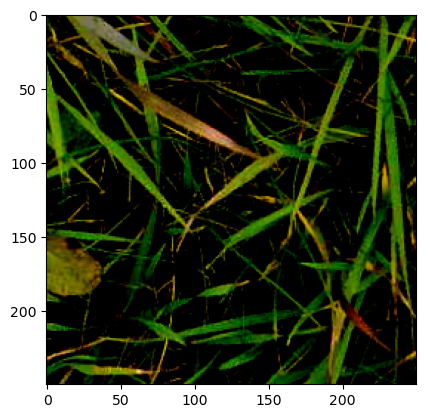

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([0])

In [58]:
img = preprocess(r"C:\Users\ysais\Desktop\PJT1\open_sprayer_images\Docknet\train\docks\3951_19544_32363.jpg")
plt.imshow(img)
plt.show()
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
prediction = model_feat.predict(img)
prediction = dt.predict(prediction)
prediction

In [59]:
import sklearn

val_feature_matrix = []
for item in test_images:
    item = np.reshape(item, [1, item.shape[0], item.shape[1], item.shape[2]])
    feat_train = model_feat.predict(item)
    val_feature_matrix.append(feat_train)
val_feature_matrix = np.array(val_feature_matrix)[:,0,:]

print('Train Accuracy: ' + str(dt.score(test_fm,np.array(train_labels))) + '\n')
print('Validation Accuracy: ' + str(dt.score(val_feature_matrix,np.array(test_labels))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

## ROC curve and AUC scores

AUC(SVM): 0.953
AUC(RF): 0.952
AUC(DT): 0.883
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1

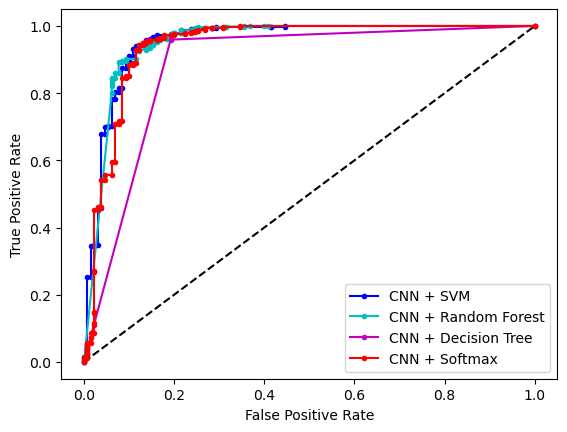

In [60]:
# roc curve and auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# CNN + SVM
probs = svm.predict_proba(val_feature_matrix)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(np.array(test_labels), probs)
print('AUC(SVM): %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(test_labels), probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--', color = 'k')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='CNN + SVM', color = 'b')

# CNN + RF
probs = rf.predict_proba(val_feature_matrix)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(np.array(test_labels), probs)
print('AUC(RF): %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(test_labels), probs)
# plot no skill
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='CNN + Random Forest', color = 'c')

# CNN + DT
probs = dt.predict_proba(val_feature_matrix)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(np.array(test_labels), probs)
print('AUC(DT): %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(test_labels), probs)
# plot no skill
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='CNN + Decision Tree', color = 'm')


# CNN + Softmax
probs = []
for i,file in enumerate(test_images):
    file = np.reshape(file, [1, file.shape[0], file.shape[1], file.shape[2]])
    prediction = model.predict(file)
    probs.append(prediction)
probs = np.array(probs)
probs = np.reshape(probs, (probs.shape[0],2))
probs = probs[:,1]
auc = roc_auc_score(np.array(test_labels), probs)
print('AUC(Softmax): %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(np.array(test_labels), probs)
# plot no skill
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='CNN + Softmax', color = 'r')


# show the plot
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
pyplot.show()

## Precision-recall curve and f1

CNN + SVM: f1=0.965 ap=0.980
CNN + RF: f1=0.962 ap=0.980
CNN + DT: f1=0.957 ap=0.948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1

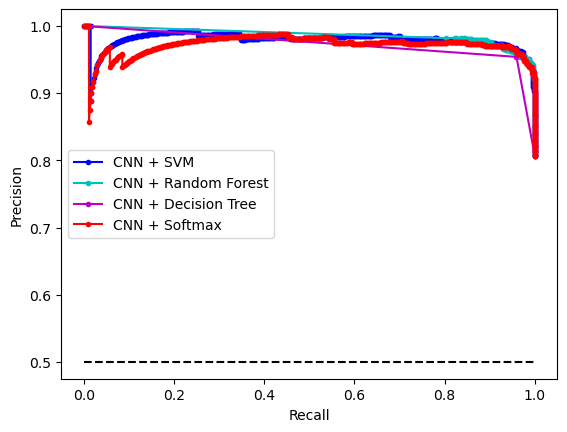

In [61]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot

# CNN + SVM
probs = svm.predict_proba(val_feature_matrix)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = svm.predict(val_feature_matrix)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(np.array(test_labels), probs)
# calculate F1 score
f1 = f1_score(np.array(test_labels), yhat)
# calculate average precision score
ap = average_precision_score(np.array(test_labels), probs)
print('CNN + SVM: f1=%.3f ap=%.3f' % (f1, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--', color='k')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label='CNN + SVM', color='b')

# CNN + RF
probs = rf.predict_proba(val_feature_matrix)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = rf.predict(val_feature_matrix)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(np.array(test_labels), probs)
# calculate F1 score
f1 = f1_score(np.array(test_labels), yhat)
# calculate average precision score
ap = average_precision_score(np.array(test_labels), probs)
print('CNN + RF: f1=%.3f ap=%.3f' % (f1, ap))
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label='CNN + Random Forest', color='c')

# CNN + DT
probs = dt.predict_proba(val_feature_matrix)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = dt.predict(val_feature_matrix)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(np.array(test_labels), probs)
# calculate F1 score
f1 = f1_score(np.array(test_labels), yhat)
# calculate average precision score
ap = average_precision_score(np.array(test_labels), probs)
print('CNN + DT: f1=%.3f ap=%.3f' % (f1, ap))
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label='CNN + Decision Tree', color='m')

# CNN + Softmax
probs = []
for i,file in enumerate(test_images):
    file = np.reshape(file, [1, file.shape[0], file.shape[1], file.shape[2]])
    prediction = model.predict(file)
    probs.append(prediction)
probs = np.array(probs)
probs = np.reshape(probs, (probs.shape[0],2))
probs = probs[:,1]

yhat = []
for i,file in enumerate(test_images):
    file = np.reshape(file, [1, file.shape[0], file.shape[1], file.shape[2]])
    prediction = model.predict(file)
    prediction = np.argmax(prediction)
    yhat.append(prediction)
probs = np.array(probs)

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(np.array(test_labels), probs)
# calculate F1 score
f1 = f1_score(np.array(test_labels), yhat)
# calculate average precision score
ap = average_precision_score(np.array(test_labels), probs)
print('CNN + Softmax: f1=%.3f ap=%.3f' % (f1, ap))
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label='CNN + Softmax', color='r')

# show the plot
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
pyplot.show()

In [62]:
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the saved .sav model
saved_model_path = r"C:\Users\ysais\Desktop\PJT1\finalized_dt_model.sav"
loaded_model = joblib.load(saved_model_path)

# Sample data to replicate the feature structure, replace this with your actual dataset
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a TensorFlow model (structure similar to your saved model if possible)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Convert the trained model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to disk
with open("modeldt.tflite", "wb") as f:
    f.write(tflite_model)


Epoch 1/10


c:\Users\ysais\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5464 - loss: 0.7089 - val_accuracy: 0.8150 - val_loss: 0.5736
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8021 - loss: 0.5367 - val_accuracy: 0.8300 - val_loss: 0.4773
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.4401 - val_accuracy: 0.8550 - val_loss: 0.4079
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3526 - val_accuracy: 0.8500 - val_loss: 0.3677
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8719 - loss: 0.3106 - val_accuracy: 0.8450 - val_loss: 0.3502
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8949 - loss: 0.2826 - val_accuracy: 0.8500 - val_loss: 0.3377
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8908 - loss: 0.2724 - val_accuracy: 0.8450 - val_loss: 0.3381
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.2539 - val_accuracy: 0.8450 - val_loss: 0.3365
Ep

INFO:tensorflow:Assets written to: C:\Users\ysais\AppData\Local\Temp\tmpzg4049bq\assets


Saved artifact at 'C:\Users\ysais\AppData\Local\Temp\tmpzg4049bq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_313')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1736728266512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736728269200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736728268624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736728266704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736728268240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736728269008: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [63]:
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the saved .sav model
saved_model_path = r"C:\Users\ysais\Desktop\PJT1\finalized_rf_model.sav"
loaded_model = joblib.load(saved_model_path)

# Sample data to replicate the feature structure, replace this with your actual dataset
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a TensorFlow model (structure similar to your saved model if possible)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Convert the trained model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to disk
with open("modelrf.tflite", "wb") as f:
    f.write(tflite_model)


Epoch 1/10


c:\Users\ysais\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6253 - loss: 0.6593 - val_accuracy: 0.8050 - val_loss: 0.4922
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8072 - loss: 0.4847 - val_accuracy: 0.8700 - val_loss: 0.4021
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.3908 - val_accuracy: 0.8800 - val_loss: 0.3507
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8729 - loss: 0.3417 - val_accuracy: 0.8650 - val_loss: 0.3296
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8945 - loss: 0.2879 - val_accuracy: 0.8800 - val_loss: 0.3280
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9097 - loss: 0.2593 - val_accuracy: 0.8800 - val_loss: 0.3283
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8811 - loss: 0.2773 - val_accuracy: 0.8800 - val_loss: 0.3313
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9113 - loss: 0.2261 - val_accuracy: 0.8700 - val_loss: 0.3313
Ep

INFO:tensorflow:Assets written to: C:\Users\ysais\AppData\Local\Temp\tmp9ybrith0\assets


Saved artifact at 'C:\Users\ysais\AppData\Local\Temp\tmp9ybrith0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_317')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1736728272080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736728265744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771357776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771366224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771362192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771356816: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [64]:
import joblib
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the saved .sav model
saved_model_path = r"C:\Users\ysais\Desktop\PJT1\finalized_svm_model.sav"
loaded_model = joblib.load(saved_model_path)

# Sample data to replicate the feature structure, replace this with your actual dataset
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a TensorFlow model (structure similar to your saved model if possible)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Convert the trained model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to disk
with open("modelsvm.tflite", "wb") as f:
    f.write(tflite_model)


Epoch 1/10


c:\Users\ysais\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5586 - loss: 0.6876 - val_accuracy: 0.7850 - val_loss: 0.5468
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.4731 - val_accuracy: 0.8650 - val_loss: 0.4113
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9155 - loss: 0.3229 - val_accuracy: 0.8900 - val_loss: 0.3192
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9496 - loss: 0.2270 - val_accuracy: 0.9100 - val_loss: 0.2774
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9460 - loss: 0.1832 - val_accuracy: 0.9100 - val_loss: 0.2700
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.1574 - val_accuracy: 0.9100 - val_loss: 0.2698
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9553 - loss: 0.1287 - val_accuracy: 0.9100 - val_loss: 0.2764
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9559 - loss: 0.1443 - val_accuracy: 0.9150 - val_loss: 0.2766
Ep

INFO:tensorflow:Assets written to: C:\Users\ysais\AppData\Local\Temp\tmpq9xsllpp\assets


Saved artifact at 'C:\Users\ysais\AppData\Local\Temp\tmpq9xsllpp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_321')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1736771355664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771356240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771358736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771370064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771370256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1736771367184: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [4]:
import joblib
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pickle

# Load the saved SVM model
saved_model_path = r"C:\Users\ysais\Desktop\PJT1\finalized_dt_model.sav"
loaded_model = joblib.load(saved_model_path)

# Sample data for illustration; replace with actual data as needed
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality to 20
pca = PCA(n_components=20)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Save the PCA model
with open('pcadt_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

# Now, define and train your Keras model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_reduced.shape[1],)),  # Adjust input_shape to reduced features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_reduced, y_train, epochs=10, batch_size=32, validation_data=(X_test_reduced, y_test))

# Convert the trained model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to disk
tflite_model_path = "modeldt1.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

Epoch 1/10


c:\Users\ysais\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5103 - loss: 0.7224 - val_accuracy: 0.8000 - val_loss: 0.5962
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.5375 - val_accuracy: 0.8650 - val_loss: 0.4566
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9317 - loss: 0.3791 - val_accuracy: 0.8900 - val_loss: 0.3262
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9343 - loss: 0.2683 - val_accuracy: 0.9000 - val_loss: 0.2499
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9287 - loss: 0.2113 - val_accuracy: 0.9100 - val_loss: 0.2141
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9393 - loss: 0.1784 - val_accuracy: 0.9300 - val_loss: 0.1982
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9566 - loss: 0.1503 - val_accuracy: 0.9300 - val_loss: 0.1897
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.1469 - val_accuracy: 0.9300 - val_loss: 0.1860
Ep

INFO:tensorflow:Assets written to: C:\Users\ysais\AppData\Local\Temp\tmp0poz1wm7\assets


Saved artifact at 'C:\Users\ysais\AppData\Local\Temp\tmp0poz1wm7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2315841809360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2315744209680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2315744213520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2315744213328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2315744202384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2315744212560: TensorSpec(shape=(), dtype=tf.resource, name=None)
